# BREAST CANCER CLASSIFICATION : MALIGNANT OR BENIGN

**BY MANU SIDDHARTHA**

Cancer has been characterized as a heterogeneous disease consisting of many different subtypes. The early diagnosis and prognosis of a cancer type have become a necessity in cancer research, as it can facilitate the subsequent clinical management of patients. The importance of classifying cancer patients into high or low risk groups has led many research teams, from the biomedical and the bioinformatics field, to study the application of machine learning (ML) methods. Therefore, these techniques have been utilized as an aim to model the progression and treatment of cancerous conditions. In addition, the ability of ML tools to detect key features from complex datasets reveals their importance. 

A variety of these techniques, including Artificial Neural Networks (ANNs), Bayesian Networks (BNs), Support Vector Machines (SVMs) and Decision Trees (DTs) have been widely applied in cancer research for the development of predictive models, resulting in effective and accurate decision making. Even though it is evident that the use of ML methods can improve our understanding of cancer progression, an appropriate level of validation is needed in order for these methods to be considered in the everyday clinical practice. 

In this project, I have developed and explored the power of support vector machine in classifying breast cancer into malignant or benign.

**Benign**
When a tumor is diagnosed as benign, doctors will usually leave it alone rather than remove it. Even though these tumors are not generally aggressive toward surrounding tissue, occasionally they may continue to grow, pressing on organs and causing pain or other problems. In these situations, the tumor is removed, allowing pain or complications to subside.

**Malignant**
Malignant tumors are cancerous and aggressive because they invade and damage surrounding tissue. When a tumor is suspected to be malignant, the doctor will perform a biopsy to determine the severity or aggressiveness of the tumor.

The Original source of data is from **University of Wisconsin, Clinical Sciences Center Madison** which is present in **UCI Mchine Learning repository**

I have extracted the data from the above source and made csv with some minor modifications.

<img src="https://image.ibb.co/kxBmGz/breast_cancer.png" alt="class">

<img src="https://image.ibb.co/kxSX49/c1PNG.png" alt="class">

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns


# Any results you write to the current directory are saved as output.

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [6]:
print(cancer['target_names'])

['malignant' 'benign']


In [7]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [8]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
print(cancer['data'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [10]:
cancer['data'].shape

(569, 30)

In [11]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [12]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


**Just looking at the tail or last 5 entries to know the distribution of data **

In [13]:
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [14]:
df_cancer.shape

(569, 31)

**Means there are 569 rows and 31 columns**

**Checking if there are any nulls in any column**

In [15]:
df_cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# Feature Visualization

Looking at the Visualization of important features in relation to target variable diagnosis to see on which features it is more related

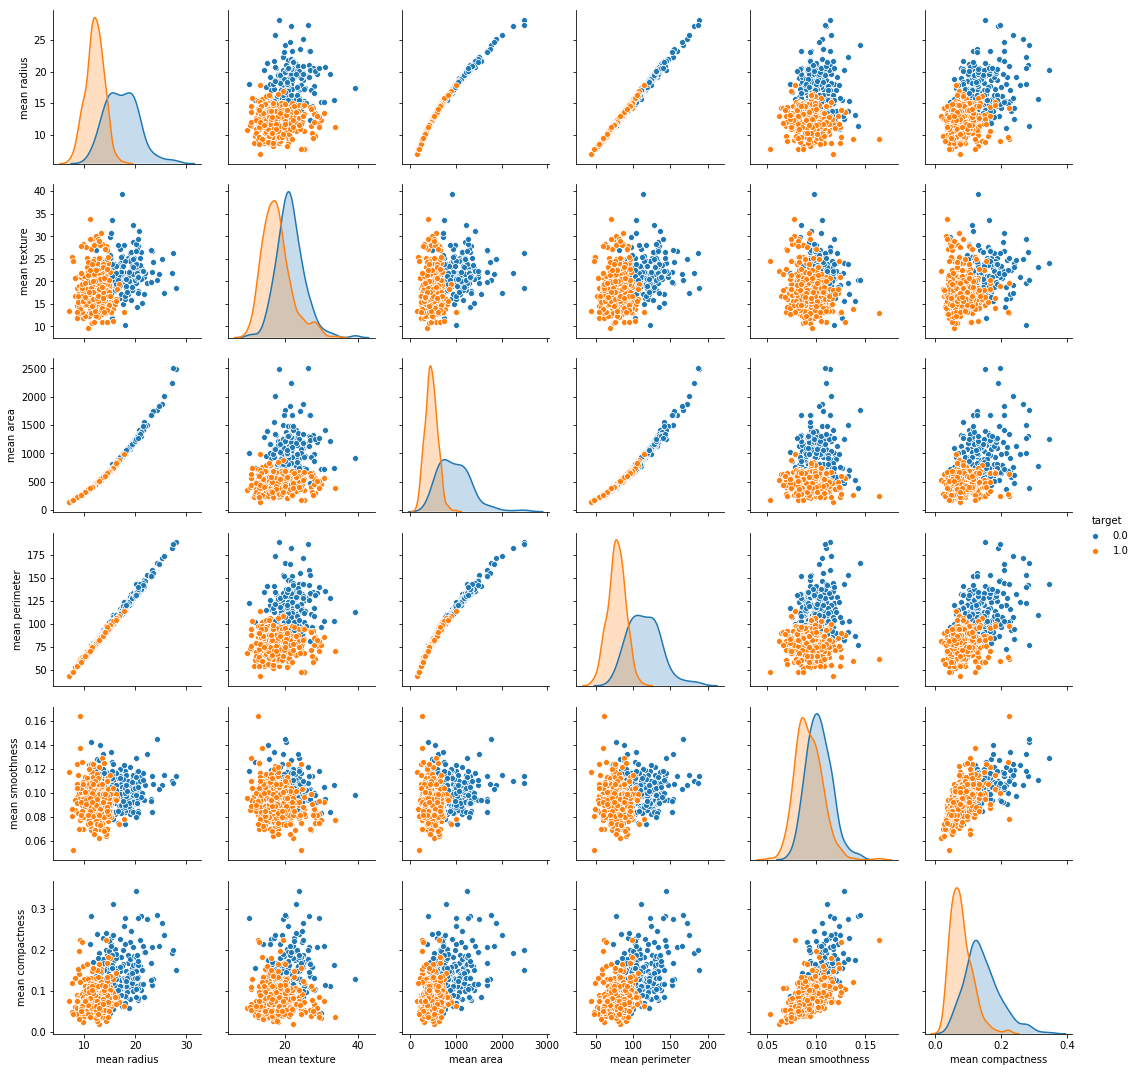

In [16]:
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness', 'mean compactness'] )

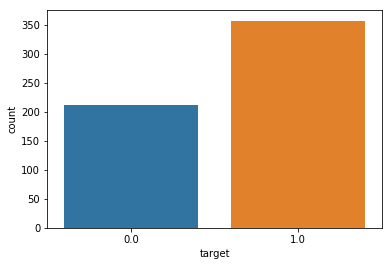

In [17]:
sns.countplot(df_cancer['target'], label = "Count") 

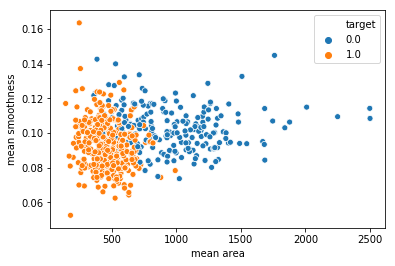

In [18]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df_cancer)

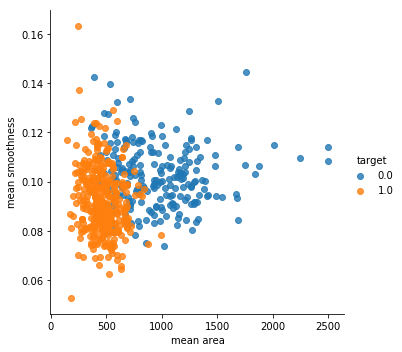

In [19]:
sns.lmplot('mean area', 'mean smoothness', hue ='target', data = df_cancer, fit_reg=False)

As we have seen from above visualizations,there are uneven distribution between different features such as mean area is in 500,1000,1500 etc. while mean smoothness is in 0.06 0.08 very less than 1 , so for these type of uneven distribution machine learning algorithm behaves in a very strange way and it will not give accurate results to us.

So, we have to normalize the data or you can say we have to perform the feature scaling so that all the data in different features will be within the range of 0 to 1.

So, we will normalize the data later, before that we will train the data as it is to see the result, then after normalization we will compare our results to see the difference.

Apart from visualization. But if you want to  see numbers and stats, then there are other ways to find out how data correlates.

Pearson’s Correlation Coefficient helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson’s Correlation Coefficient can be between -1 to +1.

1 means that they are highly correlated and 0 means no correlation. -1 means that there is a negative correlation. Think of it as an inverse proportion.

The t-test is a correlation coefficient testing for any correlation between two values.

Other popular correlation coefficients include

**Spearman rank order correlation**
**Pearson’s Rank Correlation.**

The importance of data correlation has an effect when you have a dataset with many features. It’s tempting to think that a larger number of features will help a model make better predictions. But that’s incorrect.

If you try to train a model on a set of features with no or very little correlation, you will get inaccurate results.

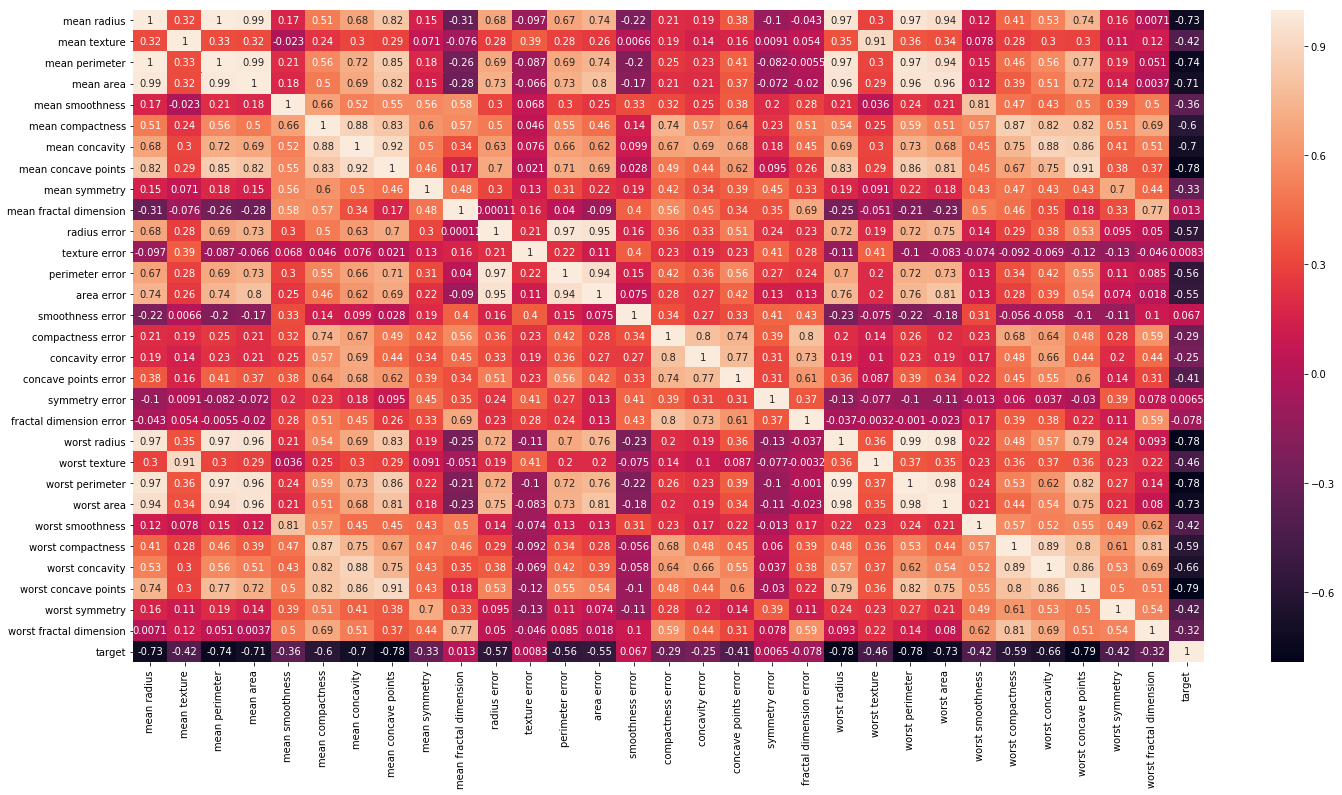

In [20]:
plt.figure(figsize=(24,12)) 
sns.heatmap(df_cancer.corr(), annot=True) 

In [21]:
X = df_cancer.drop(['target'],axis=1)

In [22]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [23]:
y = df_cancer['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     1.0
21     1.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
539    1.0
540    1.0
541    1.0
542    1.0
543    1.0
544    1.0
545    1.0
546    1.0
547    1.0
548    1.0
549    1.0
550    1.0
551    1.0
552    1.0
553    1.0
554    1.0
555    1.0
556    1.0
557    1.0
558    1.0
559    1.0
560    1.0
561    1.0
562    0.0
563    0.0
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

**Now, we will split training and testing dataset using sklearn to X_train, X_test,y_train,y_test**

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

I beleive for this problem **Support Vector Machines** are good classification algorithm for this problem.
Now , lets know <br>
**What is a Support Vector and what is SVM?**
A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression purposes. SVMs are more commonly used in classification problems and as such, this is what we will focus on in this post.

SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes, as shown in the image below
<img src="https://image.ibb.co/g0rmWp/svm1.png" alt="class">

Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set.

**What is a hyperplane?**
 
As a simple example, for a classification task with only two features (like the image above), you can think of a hyperplane as a line that linearly separates and classifies a set of data.

Intuitively, the further from the hyperplane our data points lie, the more confident we are that they have been correctly classified. We therefore want our data points to be as far away from the hyperplane as possible, while still being on the correct side of it.

So when new testing data is added, whatever side of the hyperplane it lands will decide the class that we assign to it.

**How do we find the right hyperplane?**
 
Or, in other words, how do we best segregate the two classes within the data?

The distance between the hyperplane and the nearest data point from either set is known as the margin. The goal is to choose a hyperplane with the greatest possible margin between the hyperplane and any point within the training set, giving a greater chance of new data being classified correctly.
<img src="https://image.ibb.co/mU6Lrp/svm2.png" alt="class">

In [25]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 0, 48],
       [ 0, 66]], dtype=int64)

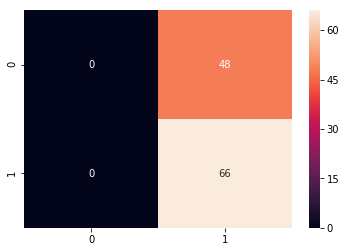

In [27]:
sns.heatmap(cm, annot=True)

In [28]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        48
        1.0       0.58      1.00      0.73        66

avg / total       0.34      0.58      0.42       114



C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Normalization

As, we have seen above results are not satisfactory so we have to improve our model and perform some preprocessing before fitting the data to model

So, we will perform normalization so that all the features will be in the range of 0 to 1. 

In [29]:
min_train = X_train.min()
min_train

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.362100
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000950
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [30]:
range_train = (X_train - min_train).max()
range_train

mean radius                  21.129000
mean texture                 29.570000
mean perimeter              144.710000
mean area                  2355.500000
mean smoothness               0.110770
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.045790
radius error                  2.761500
texture error                 4.522900
perimeter error              21.223000
area error                  518.798000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.071068
fractal dimension error       0.028890
worst radius                 25.190000
worst texture                37.520000
worst perimeter             170.390000
worst area                 3246.800000
worst smoothness              0.129430
worst compactness        

In [31]:
X_train_scaled = (X_train - min_train)/range_train

In [32]:
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
306,0.294335,0.206628,0.278350,0.167183,0.293220,0.101620,0.003423,0.016208,0.288889,0.196113,...,0.257245,0.224680,0.244087,0.139122,0.321641,0.104113,0.010136,0.085911,0.258019,0.188968
410,0.207251,0.265810,0.198328,0.108809,0.324546,0.103521,0.065206,0.104374,0.273232,0.200262,...,0.203255,0.647655,0.203416,0.103517,0.572742,0.130890,0.163891,0.298900,0.334521,0.146989
197,0.525297,0.410213,0.508673,0.373806,0.190304,0.205632,0.258435,0.287177,0.358586,0.075126,...,0.469631,0.337953,0.461823,0.321178,0.131731,0.163974,0.229412,0.315498,0.191019,0.069133
376,0.169861,0.355428,0.182157,0.082700,0.343956,0.449727,0.534208,0.295278,0.569697,0.754313,...,0.115919,0.287846,0.153178,0.051343,0.333230,0.324640,0.545701,0.503436,0.245189,0.426079
244,0.587770,0.466351,0.589524,0.429421,0.452018,0.418441,0.480084,0.441650,0.463636,0.219262,...,0.544661,0.493337,0.554551,0.379389,0.580468,0.261480,0.312941,0.537457,0.321929,0.138397


# Comparison between scaled & unscaled feature visualization

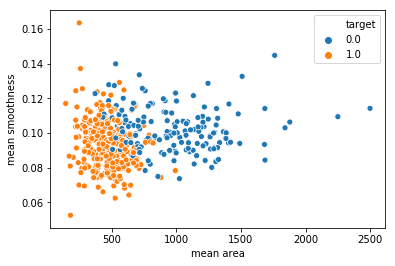

In [33]:
sns.scatterplot(x = X_train['mean area'], y = X_train['mean smoothness'], hue = y_train)

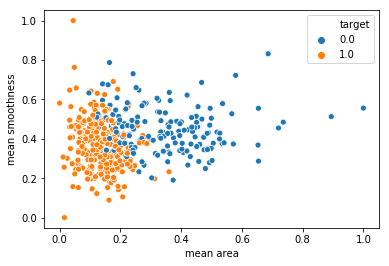

In [34]:
sns.scatterplot(x = X_train_scaled['mean area'], y = X_train_scaled['mean smoothness'], hue = y_train)

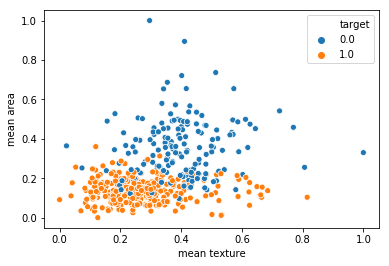

In [35]:
sns.scatterplot(x = X_train_scaled['mean texture'], y = X_train_scaled['mean area'], hue = y_train)

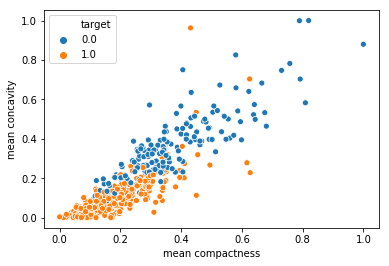

In [36]:
sns.scatterplot(x = X_train_scaled['mean compactness'], y = X_train_scaled['mean concavity'], hue = y_train)

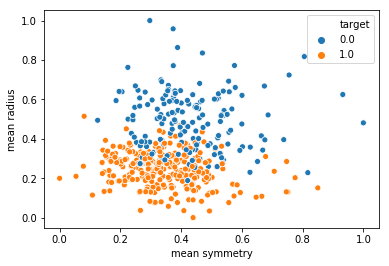

In [37]:
sns.scatterplot(x = X_train_scaled['mean symmetry'], y = X_train_scaled['mean radius'], hue = y_train)

# Analysis

As from the above plot it is inferred that :
1. Benign cases have less mean area whereas malignant cases have larger mean area. 
2. Benign cases have lesser concavity and lesser compactness in comparison to Malignant cases
3. Mean Radius is larger in Malignant cases and smaller mean radius in benign cases.

In [38]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [39]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

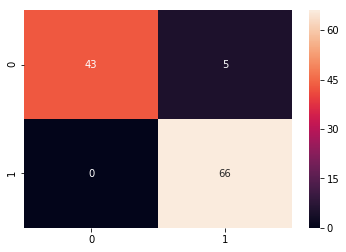

In [44]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [50]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

        0.0       1.00      0.90      0.95        48
        1.0       0.93      1.00      0.96        66

avg / total       0.96      0.96      0.96       114



**Improving the model using** **GridSearchCV** <br>
what is **GridSearch ?** <br>
Grid Search is an algorithm with the help of which we can tune hyper-parameters of a model. We pass the hyper-parameters to tune, the possible values for each hyper-parameter and a performance metric as input to the grid search algorithm. The algorithm will then place all the possible hyper-parameter combination in a grid and then find the performance of the model for each combination against some cross-validation set. Then it outputs the hyper-parameter combination that gives the best result.

GridSearch is generally used when you are not sure of good values for a parameter. We might have a range of parameter values that you think would work out for the model and you want to test which one of them to use. In that situation it becomes tedious for us to train the model again and again with different parameters and in that situation we use gridSearch.

Let us suppose that : To solve the optimization problem for a fixed set of values of hyperparameters α and β gives us a value of w. Since the optimal value of w (call it w∗) is a function of α and β, we can write it as follows:

**w∗(α,β)=argminwP(w,α,β,Strain)**

Now we use this w∗ to predict on the validation sample to get validation error. We can view this scenario in terms of a "validation error function": the function takes as inputs the hyperparameters α and β, and returns the validation error corresponding to w∗(α,β).

So the goal of hyperparameter optimization is to find the set of values of α and β, that minimize this validation error function.

So, in Grid Search technique, it picks a bunch of values of α -- (α1,α2,…) and a bunch of values of β -- (β1,β2,…) and for each pair of values, evaluates the validation error function. Then pick the pair that gives the minimum value of the validation error function.

The pairs (α1,β1),(α1,β2),…,(α2,β1),(α2,β2),… when plotted in space look like a grid, hence the name.
<img src="https://image.ibb.co/gJFfSU/grid123.png" alt="claass" border="0">

In [45]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [48]:
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9671052631578947, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9210526315789473, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9470198675496688, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9144736842105263, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8881578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8675496688741722, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6423841059602649, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.993421052631579, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9801324503311258, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9736842105263158, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ..................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [49]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [50]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
grid_predictions = grid.predict(X_test_scaled)

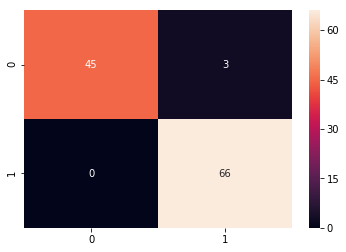

In [52]:
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm,annot=True,fmt="d")

In [59]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

        0.0       1.00      0.94      0.97        48
        1.0       0.96      1.00      0.98        66

avg / total       0.97      0.97      0.97       114



<img src="https://preview.ibb.co/nvkAuK/conclu.png" alt="class">

**Reference **  <br>
1.   https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
2.  https://www.kdnuggets.com/2016/07/support-vector-machines-simple-explanation.html
3.  https://www.researchgate.net/publication/271907638_Breast_Cancer_Detection_with_Reduced_Feature_Set
4.  https://www.nationalbreastcancer.org/breast-tumors

In [40]:
from sklearn  import ensemble
adaboost =ensemble.AdaBoostClassifier()
adaboost.fit(X_train_scaled, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

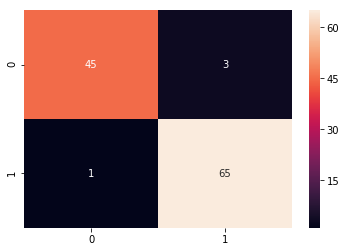

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = adaboost.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [42]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Adaboost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Adaboost,0.964912,0.955882,0.984848,0.970149,0.961174


In [53]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, grid_predictions)
acc = accuracy_score(y_test, grid_predictions)
prec = precision_score(y_test, grid_predictions)
rec = recall_score(y_test, grid_predictions)
f1 = f1_score(y_test, grid_predictions)

results = pd.DataFrame([['SVC Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVC Tuned,0.973684,0.956522,1.0,0.977778,0.96875


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
param_dist = {
      'n_estimators': [10,20,50,100,110,120,140,150,200,300,400,500,600,700],  
    'random_state':[47],
    'algorithm':['SAMME','SAMME.R'],
        'learning_rate':[0.1,0.01,0.001,0.0001,0.2,0.02]}

# run randomized search
n_iter_search =20
random_search = RandomizedSearchCV(adaboost, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)


random_search.fit(X_train_scaled,y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
rand_pred = random_search.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, rand_pred)
acc = accuracy_score(y_test, rand_pred)
prec = precision_score(y_test, rand_pred)
rec = recall_score(y_test, rand_pred)
f1 = f1_score(y_test, rand_pred)

model_results = pd.DataFrame([['SVC Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results